<a href="https://colab.research.google.com/github/khagendrakhati/Data-Visualization-Final-Project-MSDS-Regis-University/blob/main/Deep_Learning_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras import backend
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
import numpy as np
import tensorflow as tf
from keras.models import Sequential
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from PIL import Image # Library to help view images
from tensorflow.keras.preprocessing import image
from sklearn.utils import shuffle
import os, shutil # Library for navigating files
from google.colab import drive # Library to mount google drives
np.random.seed(1)

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Specify the base directory where images are located.  You need to access your data here.
base_dir = '/content/gdrive/My Drive/brainTumor'

In [ ]:
X_train = []
y_train = []
image_size = 150

In [ ]:
train_path = '/content/gdrive/My Drive/brainTumor/Training'
labels = os.listdir(train_path)
print(labels)

['meningioma_tumor', 'pituitary_tumor', 'no_tumor', 'glioma_tumor']


In [ ]:
for i in labels:
    folder_path = os.path.join(train_path, i)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, j))
        img = cv2.resize(img, (image_size, image_size))
        
        X_train.append(img)
        y_train.append(i)

In [ ]:
test_path = '/content/gdrive/My Drive/brainTumor/Testing'

In [ ]:
for i in labels:
    folder_path = os.path.join(test_path, i)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, j))
        img = cv2.resize(img, (image_size, image_size))
        
        X_train.append(img)
        y_train.append(i)

In [ ]:
X_train[1]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
y_train[1]

'meningioma_tumor'

In [ ]:
# X_train.shape, y_train.shape
len(X_train), len(y_train)

(2870, 2870)

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
X_train.shape, y_train.shape

((2870, 150, 150, 3), (2870,))

In [ ]:
X_train[1]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
y_train[1]

'meningioma_tumor'

In [ ]:
X_train, y_train = shuffle(X_train, y_train, random_state = 99)
X_train.shape, y_train.shape

((2870, 150, 150, 3), (2870,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.1, random_state = 100)

In [ ]:
y_train[:5]

array(['pituitary_tumor', 'glioma_tumor', 'pituitary_tumor',
       'glioma_tumor', 'pituitary_tumor'], dtype='<U16')

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))

y_train_new[:5]

[1, 3, 1, 3, 1]

In [ ]:
y_train_new = tf.keras.utils.to_categorical(y_train_new)
y_train_new

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))

y_test_new = tf.keras.utils.to_categorical(y_test_new)
y_test_new

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (image_size, image_size, 3)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(512, (3,3), activation = 'relu'))
model.add(Conv2D(512, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(4, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_3 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 73, 73, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 71, 71, 128)      

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
hist = model.fit(X_train, y_train_new, epochs = 20, validation_split = 0.1)

Epoch 1/20
73/73 [==============================] - 772s 11s/step - loss: 1.4091 - accuracy: 0.4256 - val_loss: 1.9527 - val_accuracy: 0.1351
Epoch 2/20
73/73 [==============================] - 779s 11s/step - loss: 0.8915 - accuracy: 0.6235 - val_loss: 1.4772 - val_accuracy: 0.1699
Epoch 3/20
73/73 [==============================] - 774s 11s/step - loss: 0.7406 - accuracy: 0.6846 - val_loss: 0.7680 - val_accuracy: 0.6873
Epoch 4/20
73/73 [==============================] - 767s 11s/step - loss: 0.6250 - accuracy: 0.7500 - val_loss: 1.2358 - val_accuracy: 0.4170
Epoch 5/20
73/73 [==============================] - 778s 11s/step - loss: 0.5599 - accuracy: 0.7681 - val_loss: 0.6772 - val_accuracy: 0.7181
Epoch 6/20
73/73 [==============================] - 780s 11s/step - loss: 0.4229 - accuracy: 0.8296 - val_loss: 0.7940 - val_accuracy: 0.6988
Epoch 7/20
73/73 [==============================] - 775s 11s/step - loss: 0.3948 - accuracy: 0.8438 - val_loss: 0.4790 - val_accuracy: 0.8301
Epoch 

In [ ]:
model.save("Brain_Tumor_Image_Classification_Model.h5")

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy'] 

In [ ]:
acc, val_acc

([0.24842767417430878,
  0.3270440399646759,
  0.42138364911079407,
  0.44025155901908875,
  0.5,
  0.5691823959350586,
  0.5786163806915283,
  0.6352201104164124,
  0.6823899149894714,
  0.6761006116867065,
  0.698113203048706,
  0.7295597195625305,
  0.7798742055892944,
  0.795597493648529,
  0.8144654035568237,
  0.849056601524353,
  0.8584905862808228,
  0.8899371027946472,
  0.8616352081298828,
  0.8081761002540588],
 [0.25,
  0.1388888955116272,
  0.3055555522441864,
  0.3611111044883728,
  0.3055555522441864,
  0.2777777910232544,
  0.3888888955116272,
  0.4722222089767456,
  0.4722222089767456,
  0.2777777910232544,
  0.2222222238779068,
  0.25,
  0.2777777910232544,
  0.4166666567325592,
  0.25,
  0.3888888955116272,
  0.3611111044883728,
  0.5,
  0.5,
  0.4444444477558136])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

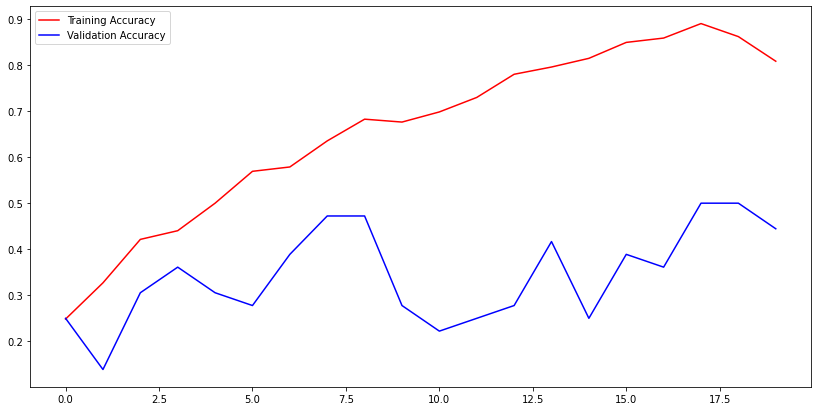

In [ ]:
epochs = range(len(acc))
fig = plt.figure(figsize = (14,7))
plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.legend(loc = 'upper left')
plt.show()

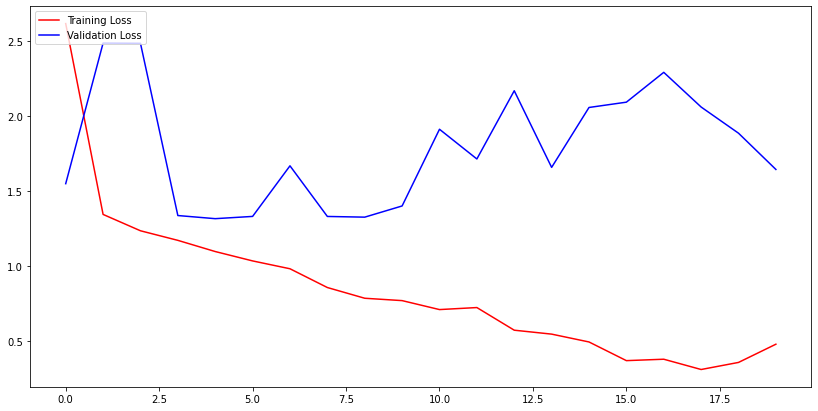

In [ ]:
loss = hist.history['loss']
val_loss = hist.history['val_loss'] 

epochs = range(len(acc))
fig = plt.figure(figsize = (14,7))
plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
img_path = '/content/gdrive/My Drive/brainTumor/Testing/glioma_tumor/image(5).jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (150, 150))
img_array = np.array(img)

img_array.shape

(150, 150, 3)

In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

In [ ]:
from tensorflow.keras.preprocessing import image

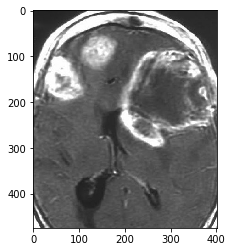

In [ ]:
img = image.load_img(img_path)
plt.imshow(img, interpolation = 'nearest')
plt.show()

In [ ]:
a = model.predict(img_array)
print(a)

1/1 [==============================] - 0s 269ms/step
[[0.04154016 0.0497205  0.89938635 0.00935298]]


In [ ]:
indices = a.argmax()
indices

2

In [ ]:
labels[indices]

'no_tumor'